## 필수 라이브러리 로딩

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

mpl.rc('font', family = 'batang')
mpl.rc('axes', unicode_minus=False)

sns.set(font='malgun gothic', rc={'axes.unicode_minus':False}, style='darkgrid')
plt.rc('figure', figsize=(10, 8))

warnings.filterwarnings('ignore')

## 데이터 불러오기

In [3]:
df = pd.read_excel('C:/k_digital/source/data/Online_Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### 데이터 기초 정보 확인

In [4]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

- InvoiceNo (주문번호) : Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode (상품코드) : Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description (상품명) : Product (item) name. Nominal.
- Quantity (수량) : The quantities of each product (item) per transaction. Numeric.
- InvoiceDate (주문날짜) : Invice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice (상품가격) : Unit price. Numeric, Product price per unit in sterling.
- CustomerID (고객아이디) : Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country (고객거주지역) : Country name. Nominal, the name of the country where each customer resides.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


- CustomID에 십만건이 비는건 아마 비회원주문건으로 추정된다

In [6]:
df.describe()
# 기초통계량 확인
# 고객아이디는 신경쓰지말고
# min값이 이상하다 음수->이상치->날리는게 좋을듯

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


- 상품의 수량과 가격의 최소값이 음수
- 이는 이상치로 판단하여 제거해주는것이 좋아보인다

In [7]:
df.isnull().sum()
# True False를 보려는게 아니고 갯수를 보려는거

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df.isnull().mean()
# 전체 비율을 볼때는 mean

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

- 비회원의 구매내역이 십만건이 넘는데 이걸 분석할 가치가 있는지도 생각
- 정보량이 적은건 아니지만 분석할만한 정보는 충분치않음(나이, 지역 등등)
- 제거하는게 좋다고 판단

## Data Cleansing

In [16]:
# 누락된 고객ID 컬럼에 누락행을 제거
df = df[df.CustomerID.notnull()]
# 인덱스자리에 조건을 쓰면 이 조건이 참인 인덱스를 찾아옴
# 결측값이 아닌(아이디가 존재하는) 컬럼을 찾아와서 df에 추가하는것 notnull
len(df)
# 아까 50만건이었는데 비회원이 제거된걸 확인할 수 있다

406829

In [17]:
# 아까 Quantity와 UnitPrice에서 확인했던 음수값 이상치를 제거
df = df[df.Quantity > 0]
df = df[df.UnitPrice > 0]
len(df)
# 확인

397884

In [18]:
df.info()
# 전부 notnull
# 맨밑에 memory usage: 27.3+ MB 메모리 효율을 신경쓰면서 돌려야할때도 있다.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [19]:
df.head()
# customID랑 unitprice 둘 다 float로 잡혀잇음
# 근데 아이디는 숫자가 아니라 카테고리니까(더하고 나누고 할 일이 없음)
# 메모리 많이 차지하는 float64일 필요가 없음
# 타입변환을 해서 메모리를 절약하기

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [20]:
# int타입으로 바꿔보기 넘파이가 제공하는 정수형32비트
df.CustomerID = df.CustomerID.astype(np.int32)
df.info()
# 메모리가 27.3+ MB -> 25.8+ MB로 줄엇다

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int32         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.8+ MB


In [21]:
# Quantity도 int64일 필요없지만 일단 두고보기

In [22]:
df.CustomerID = df.CustomerID.astype('category')
df.info()
# 더 줄엇음

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  category      
 7   Country      397884 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 25.2+ MB


In [23]:
# df.CustomerID = pd.to_numeric(df.CustomerID, downcast='integer')
# 다운캐스팅으로도 가능하다 integer = int16 
# 기본형인 int64를 16비트로 절약할수있음

In [24]:
df['Price'] = df.Quantity * df.UnitPrice
# 구매금액 컬럼을 만들어넣어주기

In [25]:
# 정제 완료된 데이터 저장
df.to_csv('online_retail.csv', index=False)
# 데이터프레임이니까 인덱스가 존재하는데 저장할땐 빼고 담음
# 나중에 불러올때 더블 인덱스가 생기는걸 방지
# 밖에 생겨잇음

## 분석

### 전체 매출과 국가별 매출 분석

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  category      
 7   Country      397884 non-null  object        
 8   Price        397884 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.2+ MB


In [27]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [28]:
len(df.Country.unique())
# 총 37개국

37

In [29]:
# 전체 매출 분석
total_revenue = df.Price.sum()
total_revenue

8911407.904

In [30]:
# 국가별 매출
rev_by_countries = df.groupby('Country')['Price'].sum().sort_values()
rev_by_countries

Country
Saudi Arabia                145.920
Bahrain                     548.400
Czech Republic              826.740
RSA                        1002.310
Brazil                     1143.600
European Community         1300.250
Lithuania                  1661.060
Lebanon                    1693.880
United Arab Emirates       1902.280
Unspecified                2667.070
Malta                      2725.590
USA                        3580.390
Canada                     3666.380
Iceland                    4310.000
Greece                     4760.520
Israel                     7221.690
Poland                     7334.650
Austria                   10198.680
Cyprus                    13590.380
Italy                     17483.240
Denmark                   18955.340
Channel Islands           20450.440
Singapore                 21279.290
Finland                   22546.080
Portugal                  33439.890
Norway                    36165.440
Japan                     37416.370
Sweden              

[Text(0, 0, 'Saudi Arabia'),
 Text(1, 0, 'Bahrain'),
 Text(2, 0, 'Czech Republic'),
 Text(3, 0, 'RSA'),
 Text(4, 0, 'Brazil'),
 Text(5, 0, 'European Community'),
 Text(6, 0, 'Lithuania'),
 Text(7, 0, 'Lebanon'),
 Text(8, 0, 'United Arab Emirates'),
 Text(9, 0, 'Unspecified'),
 Text(10, 0, 'Malta'),
 Text(11, 0, 'USA'),
 Text(12, 0, 'Canada'),
 Text(13, 0, 'Iceland'),
 Text(14, 0, 'Greece'),
 Text(15, 0, 'Israel'),
 Text(16, 0, 'Poland'),
 Text(17, 0, 'Austria'),
 Text(18, 0, 'Cyprus'),
 Text(19, 0, 'Italy'),
 Text(20, 0, 'Denmark'),
 Text(21, 0, 'Channel Islands'),
 Text(22, 0, 'Singapore'),
 Text(23, 0, 'Finland'),
 Text(24, 0, 'Portugal'),
 Text(25, 0, 'Norway'),
 Text(26, 0, 'Japan'),
 Text(27, 0, 'Sweden'),
 Text(28, 0, 'Belgium'),
 Text(29, 0, 'Switzerland'),
 Text(30, 0, 'Spain'),
 Text(31, 0, 'Australia'),
 Text(32, 0, 'France'),
 Text(33, 0, 'Germany'),
 Text(34, 0, 'EIRE'),
 Text(35, 0, 'Netherlands'),
 Text(36, 0, 'United Kingdom')]

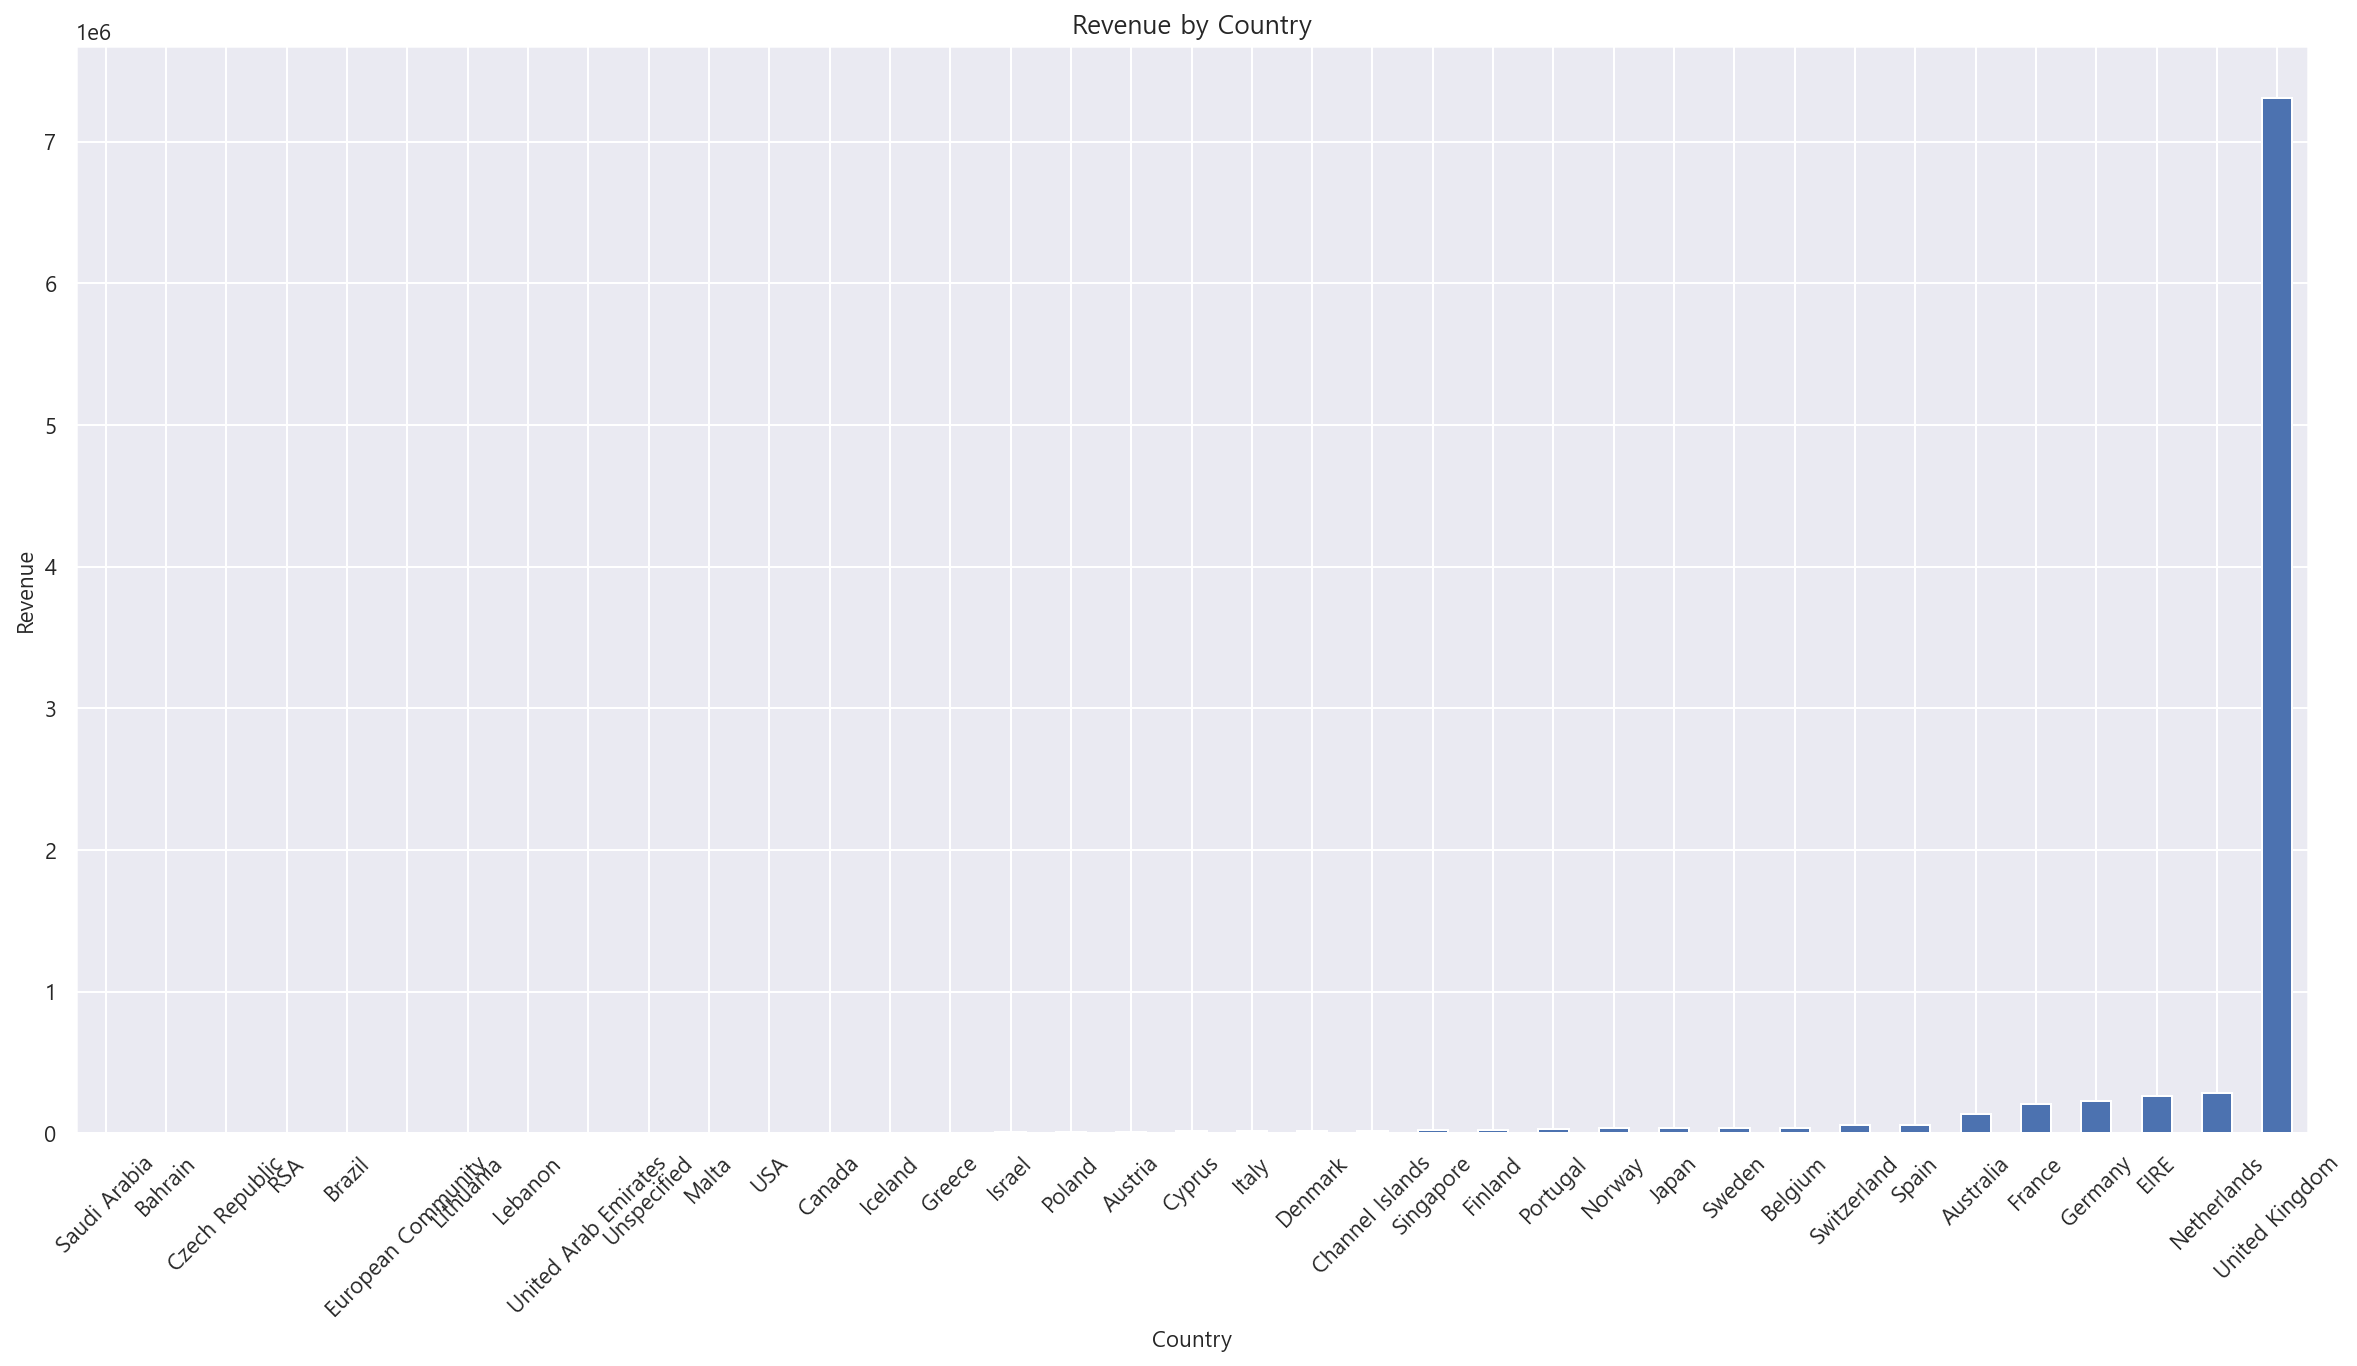

In [31]:
# 국가별 매출 시각화
plot=rev_by_countries.plot(kind='bar',figsize=(20,10))
# .plot : 판다스가 지원하는 그래프함수
# kind : 그래프형태 지정
plot.set_xlabel('Country',fontsize=11)
plot.set_ylabel('Revenue',fontsize=11)
# x축 y축 설정
plot.set_title('Revenue by Country', fontsize=13)
plot.set_xticklabels(labels=rev_by_countries.index, rotation=45)
# 글자가 안겹치게 rotation으로 살짝 돌림

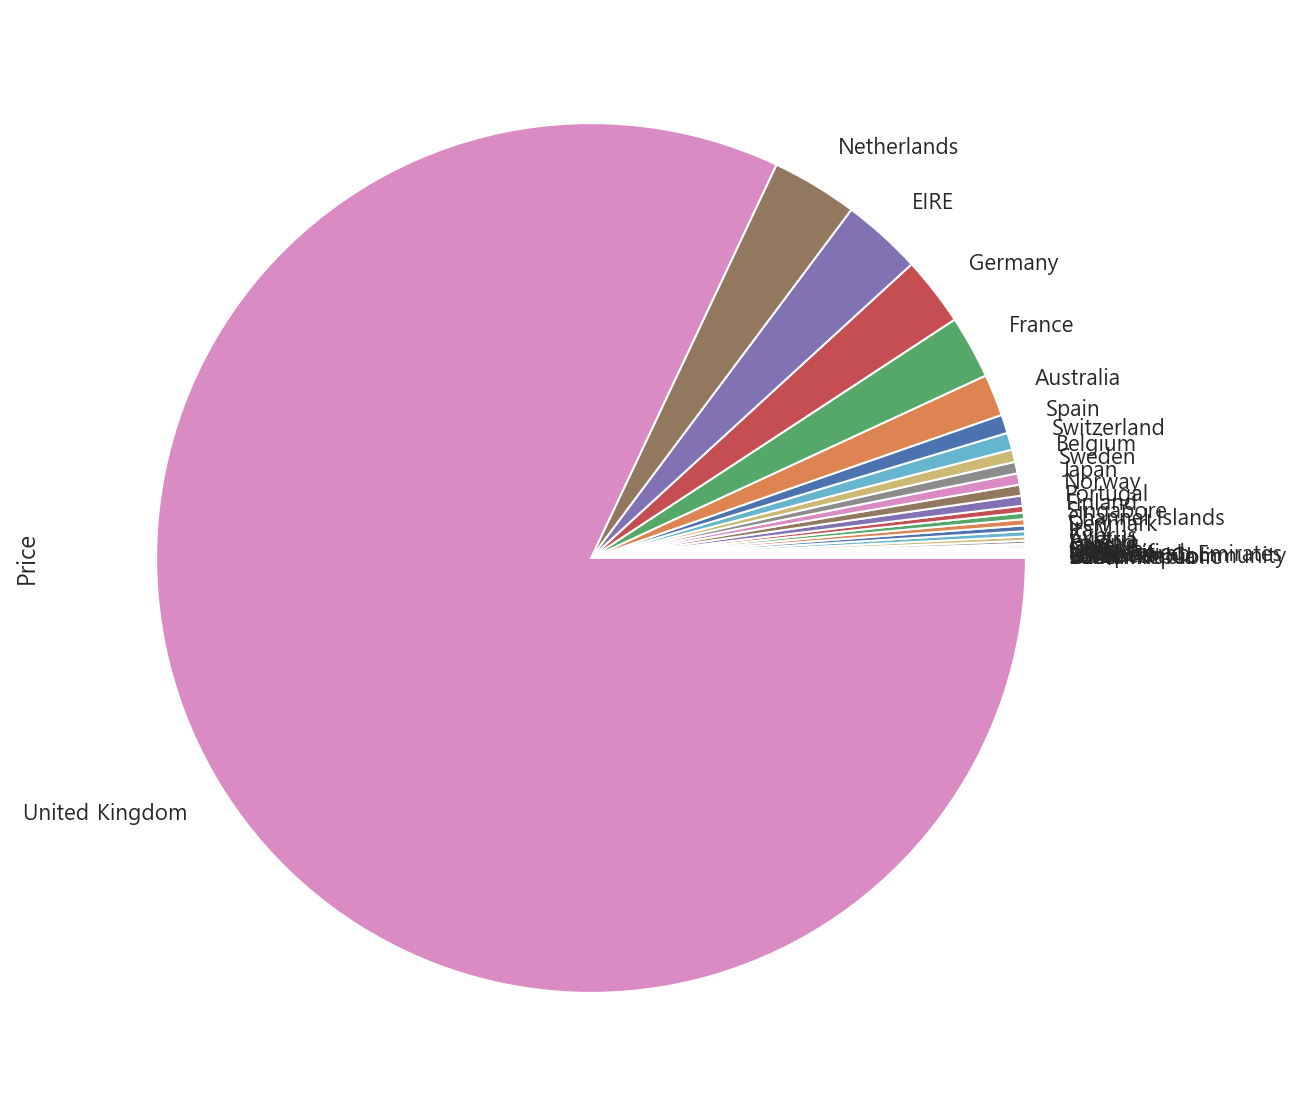

In [32]:
plot=(rev_by_countries/total_revenue).plot(kind='pie',figsize=(20,10))

<BarContainer object of 10 artists>

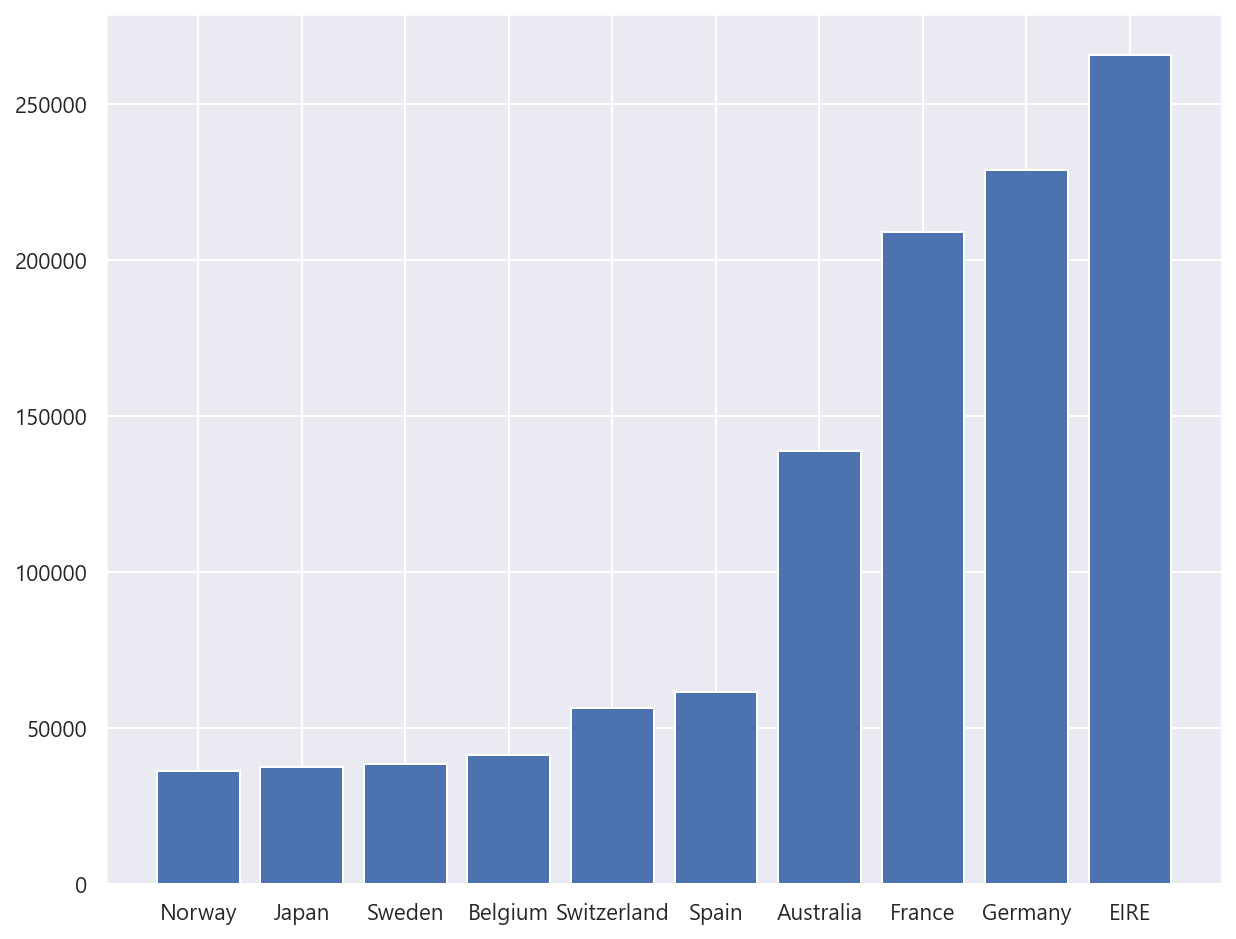

In [33]:
source2 = df.groupby('Country').sum().sort_values('Price')
plt.bar(source2.index[-12:-2], source2['Price'][-12:-2])
# 영현 작품

### 연월별 매출, 요일별 매출

In [34]:
df.iloc[0, 4]
# 인덱스를 통해 가져올거
# 0행 4열의 InvoiceDate

Timestamp('2010-12-01 08:26:00')

In [35]:
df.iloc[0, 4].year
# 연도를 얻어오고 싶을때

2010

In [36]:
df.iloc[0, 4].month
# 월을 얻어오고 싶을때

12

### 연월별 매출

In [37]:
# 가장 좋은 방법은 의미없는 인덱스말고 Invoice별로 인덱스를 재정렬해주는거
df.set_index('InvoiceDate')

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Price
InvoiceDate,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680,France,10.20
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680,France,12.60
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680,France,16.60


### 애들 코드

In [60]:
# 수진이 코드

df2 = df.copy()
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [61]:
df2 = df2.set_index('InvoiceDate')

In [62]:
d_price =df2.groupby(df2.index.day_name())['Price'].sum().sort_values()

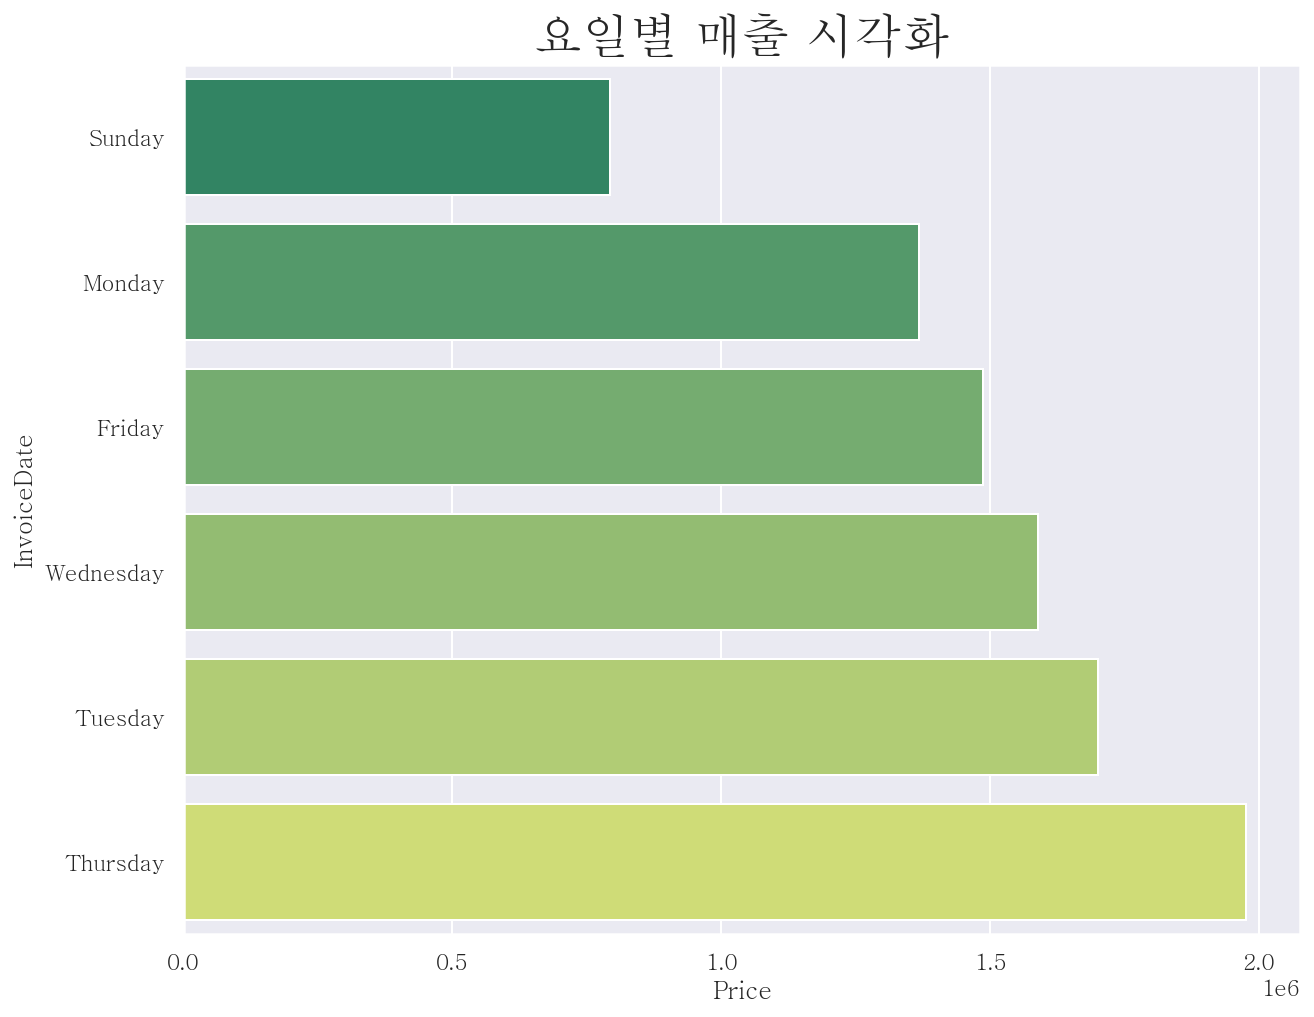

In [63]:
# 요일별매출

mpl.rcParams['font.family'] = 'batang'
sns.barplot(d_price,d_price.index, palette='summer')
sns.set(font_scale=2)
plt.title('요일별 매출 시각화')
plt.rc('figure', figsize=(30,25))
plt.show()

# 수진이 역시 시각화천재

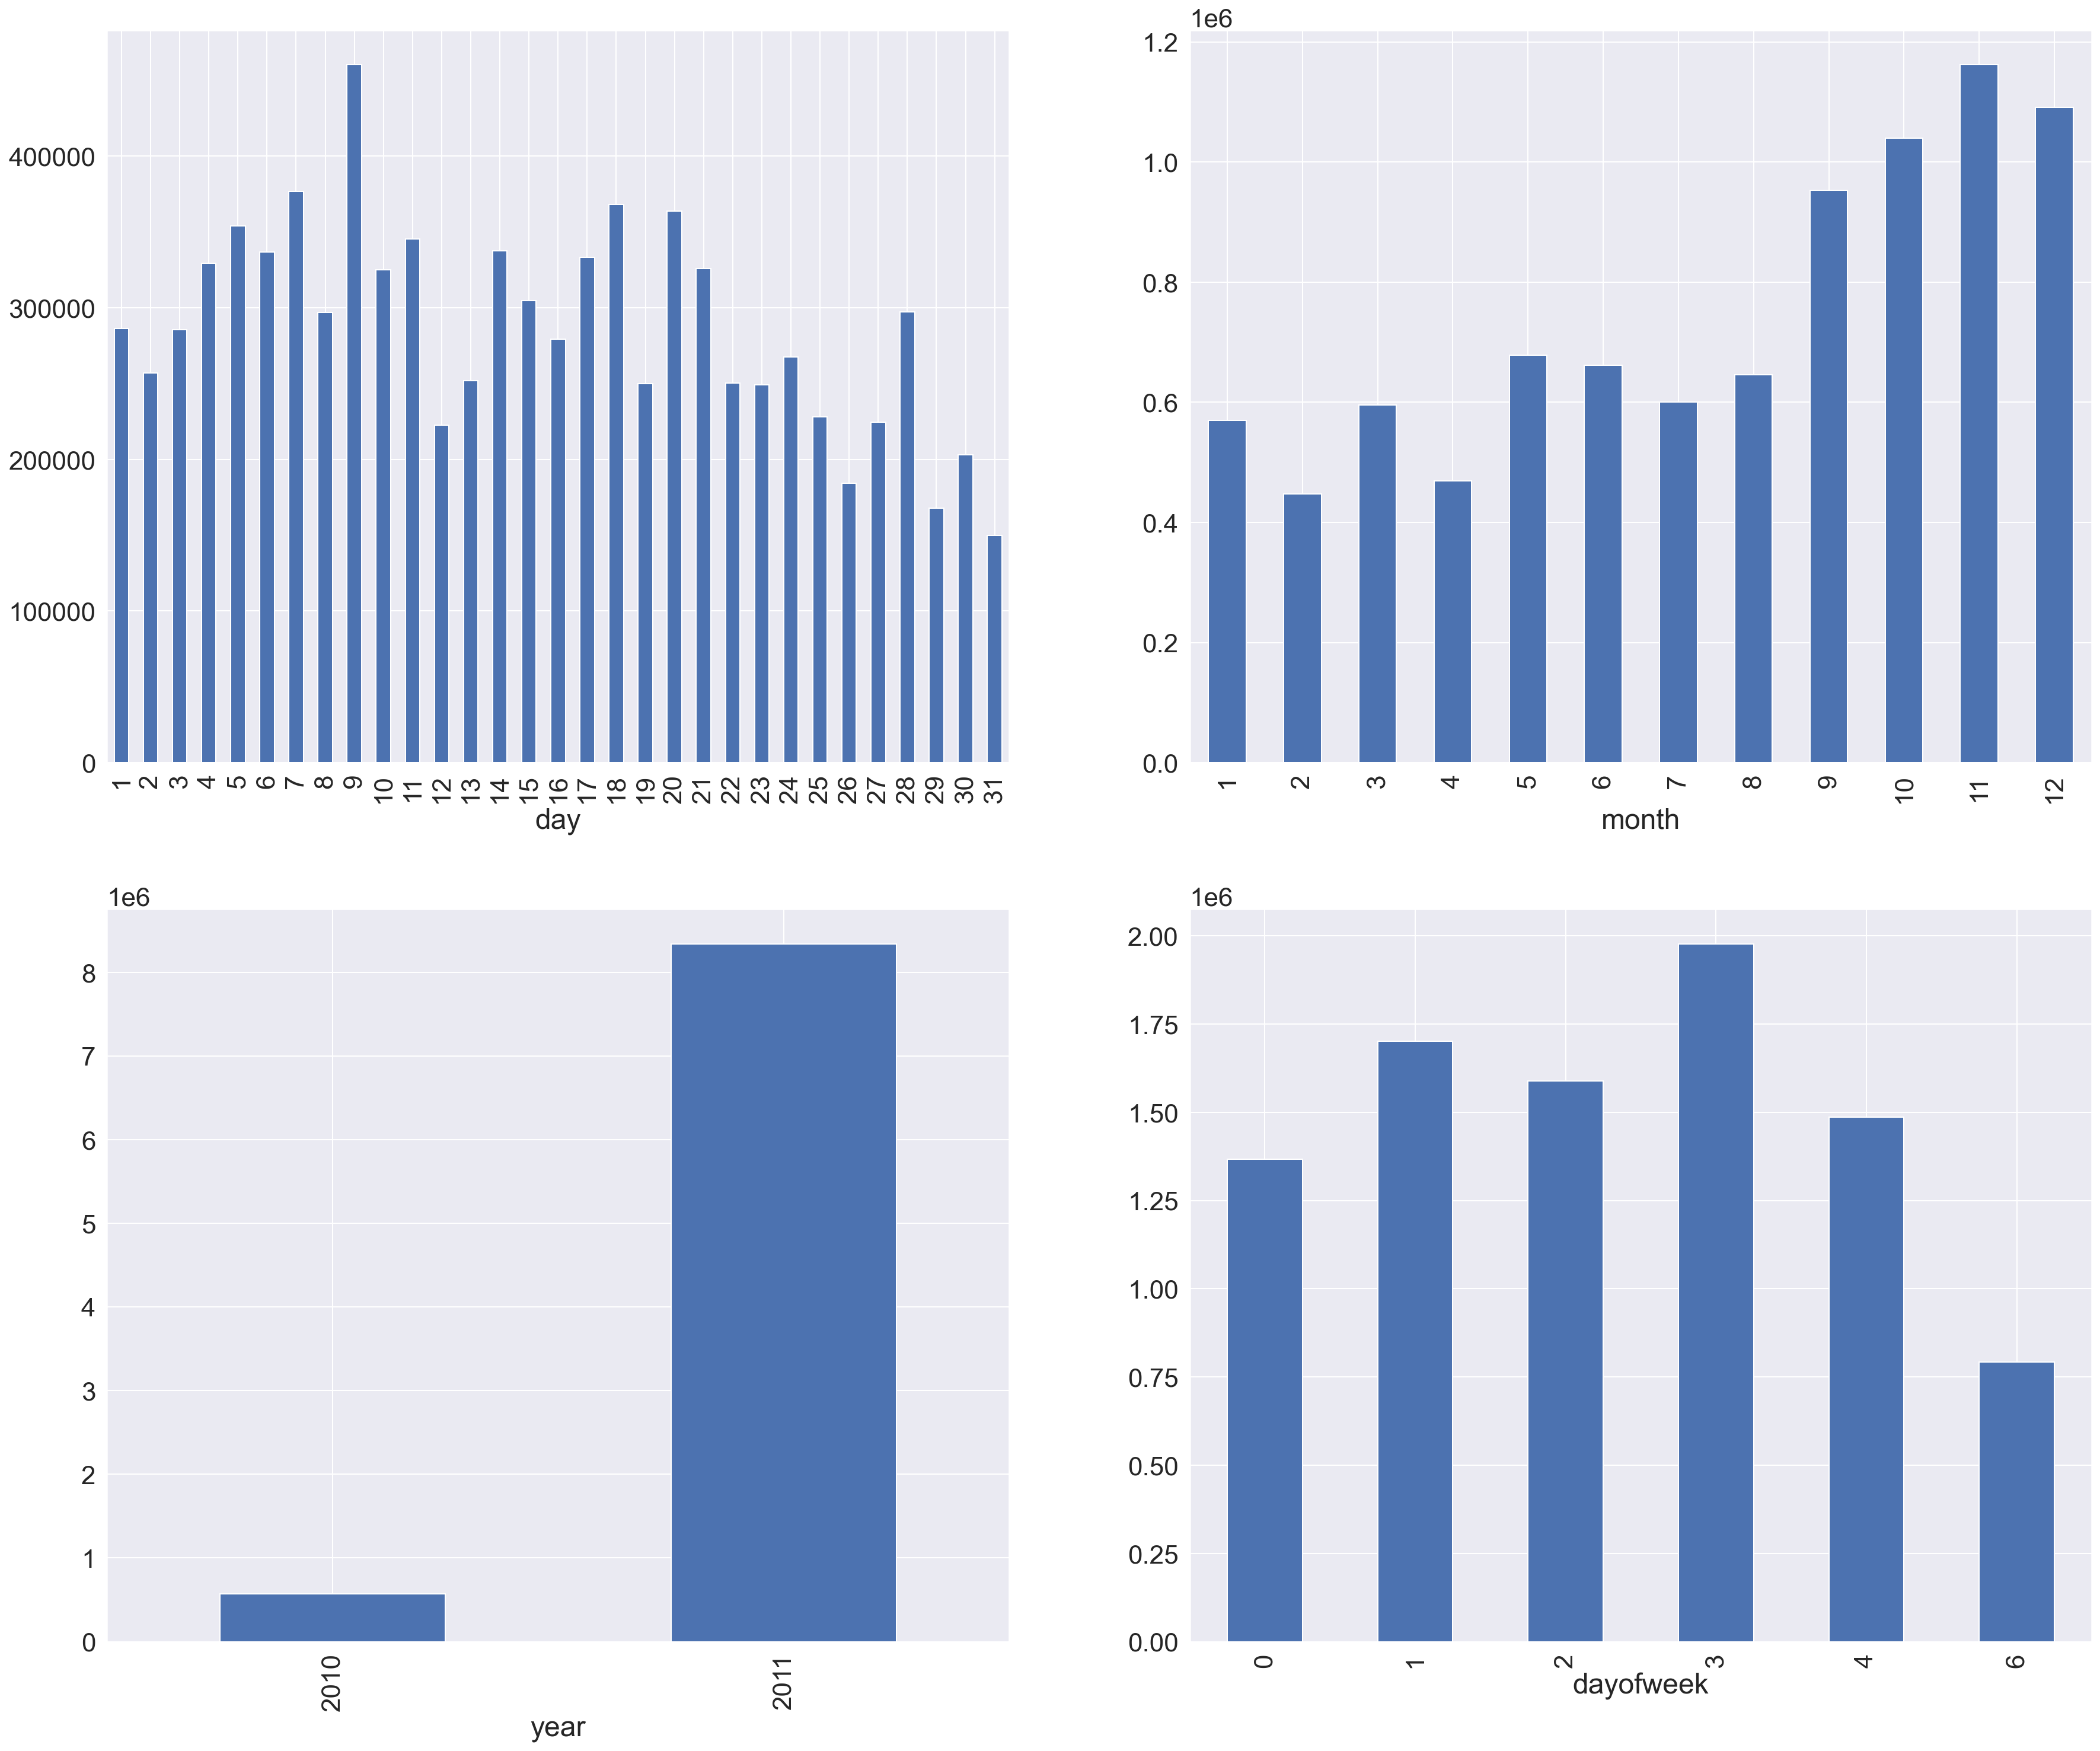

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price,day,month,year,dayofweek,time
123781,546913,47310M,"SMALL POP BOX,FUNKY MONKEY",6,2011-03-17 20:18:00,1.25,15861,United Kingdom,7.50,17,3,2011,3,20:18:00
123748,546913,20674,GREEN POLKADOT BOWL,2,2011-03-17 20:18:00,1.25,15861,United Kingdom,2.50,17,3,2011,3,20:18:00
123771,546913,16237,SLEEPING CAT ERASERS,30,2011-03-17 20:18:00,0.21,15861,United Kingdom,6.30,17,3,2011,3,20:18:00
123770,546913,16238,PARTY TIME PENCIL ERASERS,28,2011-03-17 20:18:00,0.21,15861,United Kingdom,5.88,17,3,2011,3,20:18:00
123769,546913,16236,KITTY PENCIL ERASERS,28,2011-03-17 20:18:00,0.21,15861,United Kingdom,5.88,17,3,2011,3,20:18:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184811,552710,23232,WRAP VINTAGE PETALS DESIGN,50,2011-05-11 07:35:00,0.42,13098,United Kingdom,21.00,11,5,2011,2,07:35:00
184812,552710,23231,WRAP DOILEY DESIGN,50,2011-05-11 07:35:00,0.42,13098,United Kingdom,21.00,11,5,2011,2,07:35:00
184813,552710,23209,LUNCH BAG DOILEY PATTERN,20,2011-05-11 07:35:00,1.65,13098,United Kingdom,33.00,11,5,2011,2,07:35:00
184832,552710,22740,POLKADOT PEN,48,2011-05-11 07:35:00,0.85,13098,United Kingdom,40.80,11,5,2011,2,07:35:00


In [81]:
# 보원이 코드


df['day'] = df['InvoiceDate'].dt.day
df['month'] = df['InvoiceDate'].dt.month
df['year'] = df['InvoiceDate'].dt.year
df['dayofweek'] = df['InvoiceDate'].dt.dayofweek

# 일별 매출 
day = df.groupby('day')['Price'].sum()
# 월별매출 
month = df.groupby('month')['Price'].sum()
# 연별 매출
year = df.groupby('year')['Price'].sum()
# 요일별 매출 : 0~6 월 ~ 일 
dayofweek = df.groupby('dayofweek')['Price'].sum()


plt.subplot(2,2,1)
day.plot(kind='bar')
plt.subplot(2,2,2)
month.plot(kind='bar')
plt.subplot(2,2,3)
year.plot(kind='bar')
plt.subplot(2,2,4)
dayofweek.plot(kind='bar')
plt.show()


In [65]:
import datetime


In [66]:
def extract_ym(date):
    year = str(date.year)
    month = date.month
    
    if month < 10:
        month = '0' + str(month)
        
    return year + str(month)

In [83]:
rev_by_ym = df.index.groupby(extract_ym)['Price'].sum()
# 왜 Price를 못찾지?
rev_by_ym

KeyError: 'Price'

In [92]:
# strftime : 날짜/시간을 str으로 변환

# import datetime
now = datetime.datetime.now()

date = now.strftime('%Y-%m-%d')
print(date)      # 2021-04-08
 
time = now.strftime('%H:%M:%S')
print(time)      # 21:28:20
 
datetime = now.strftime('%Y-%m-%d %H:%M:%S')
print(datetime)  # 2021-04-08 21:28:20

2022-11-18
12:34:12
2022-11-18 12:34:12


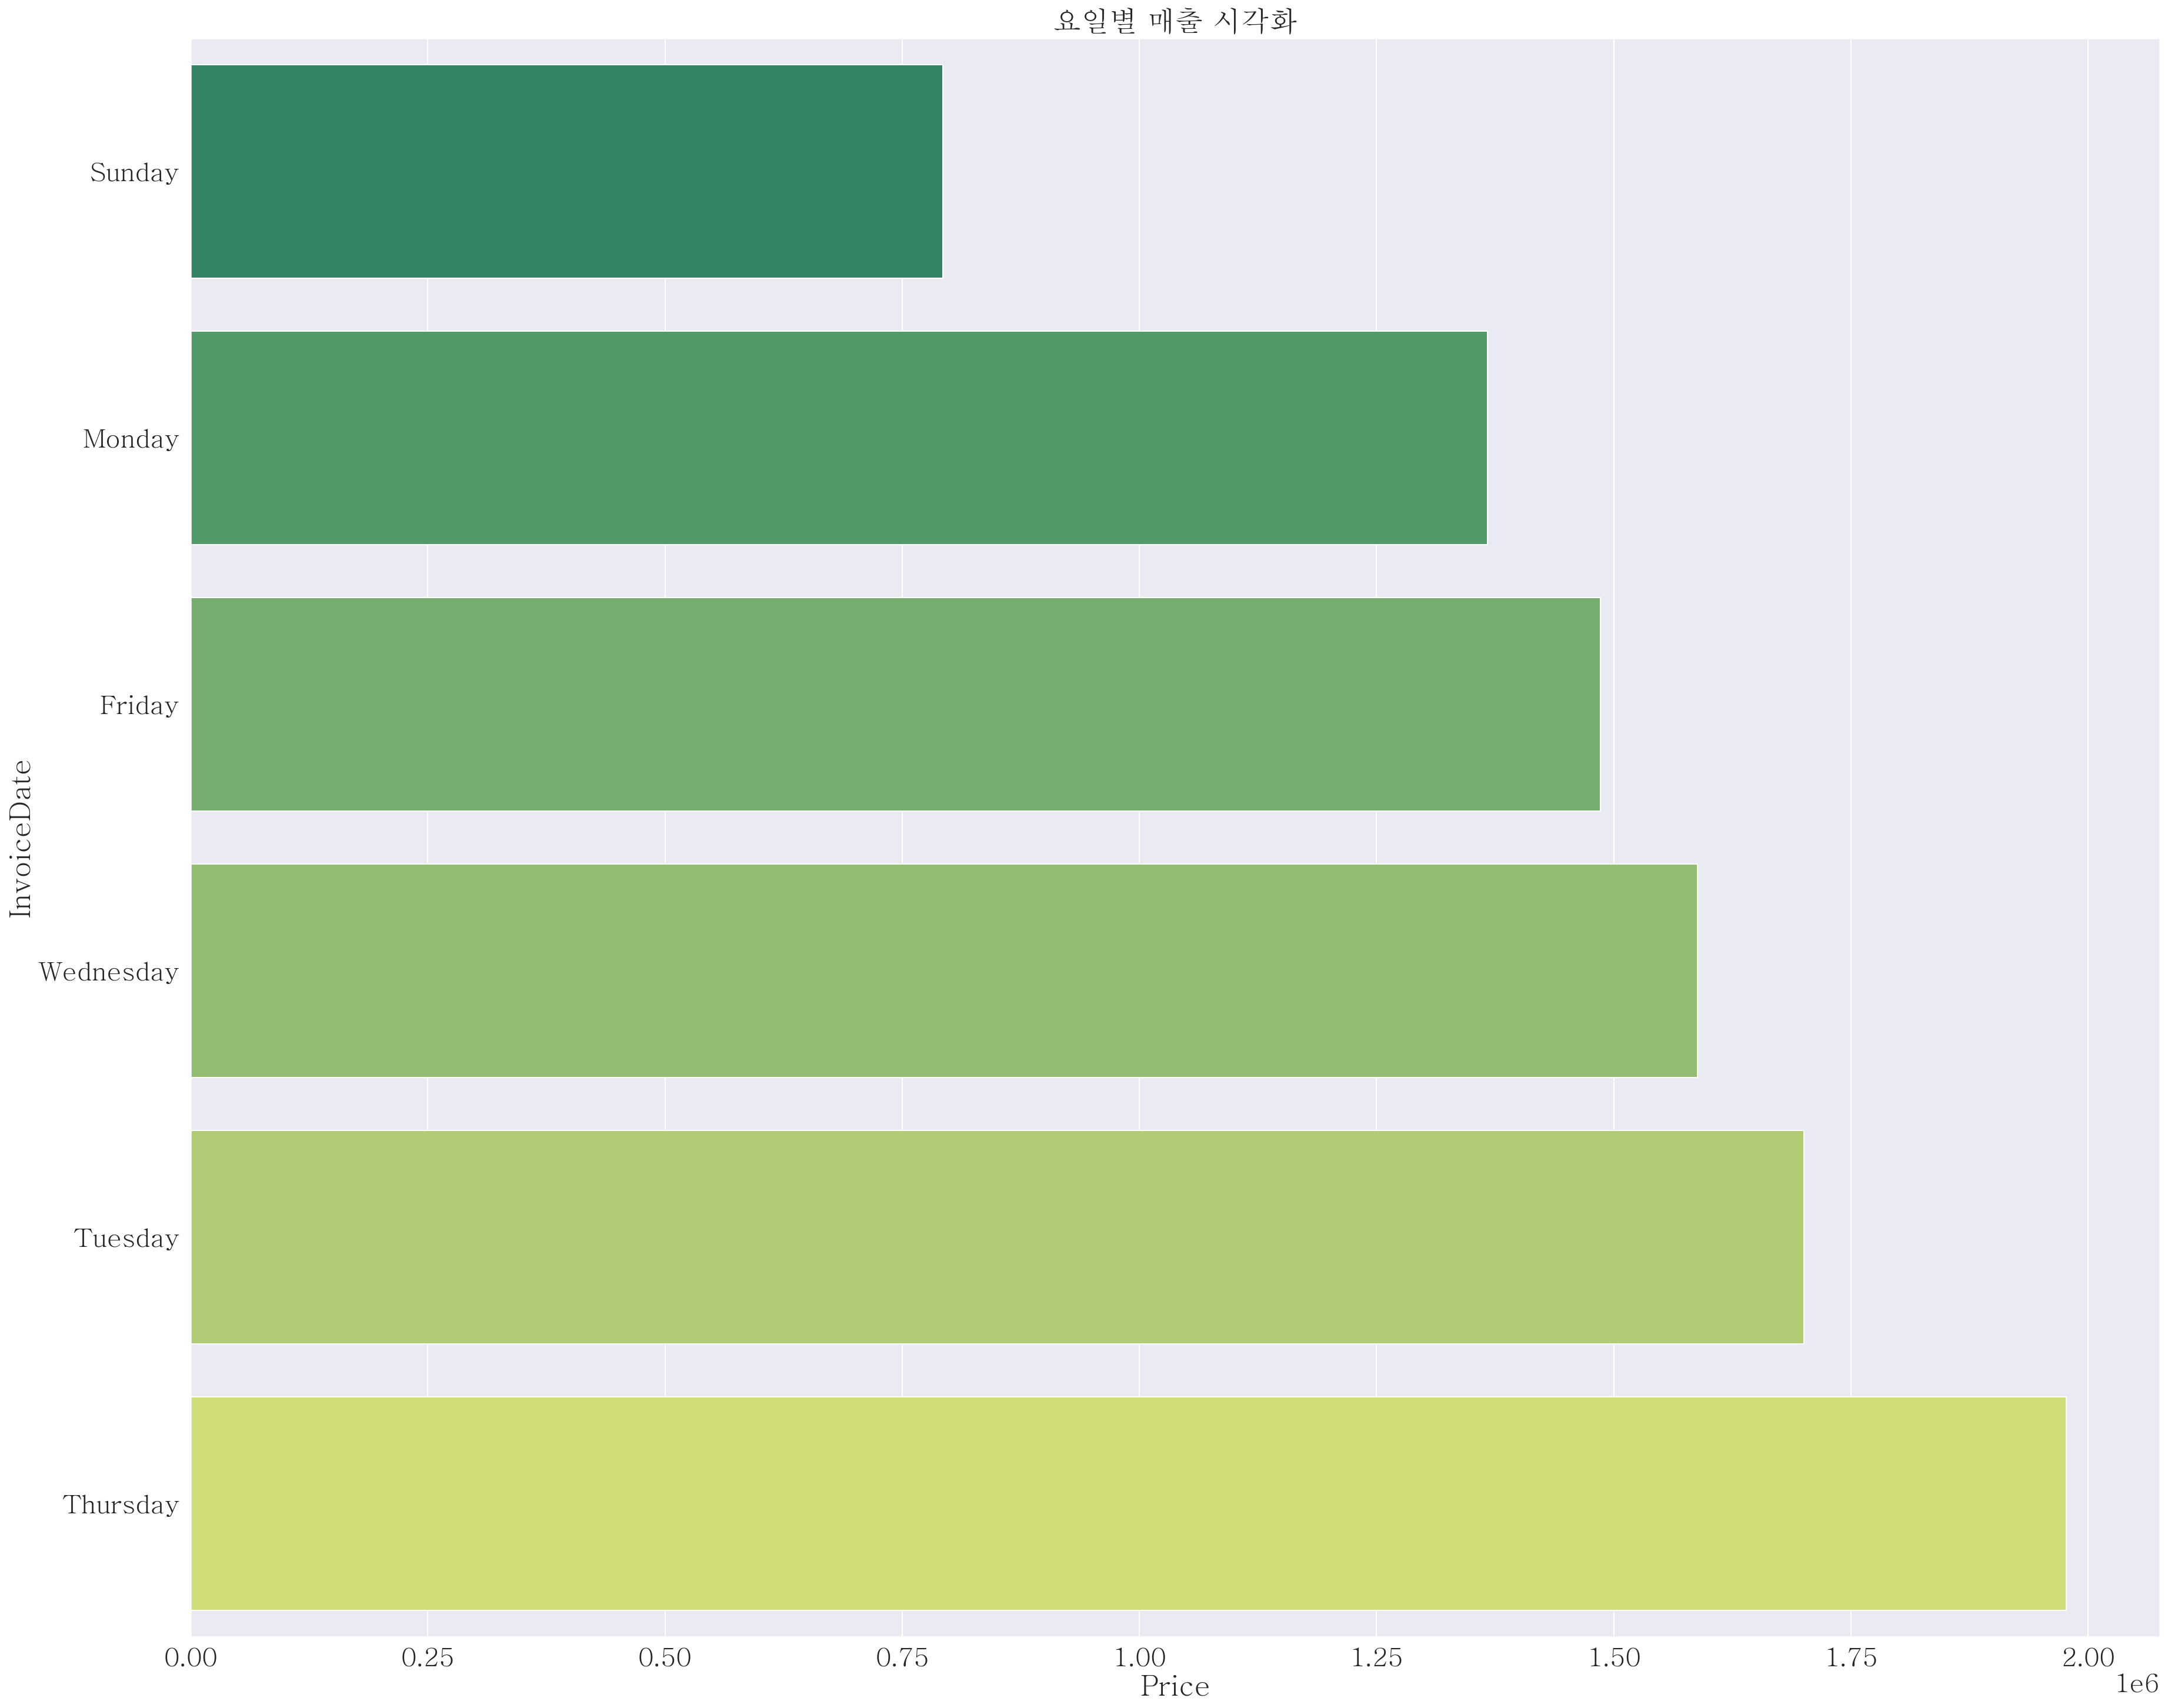

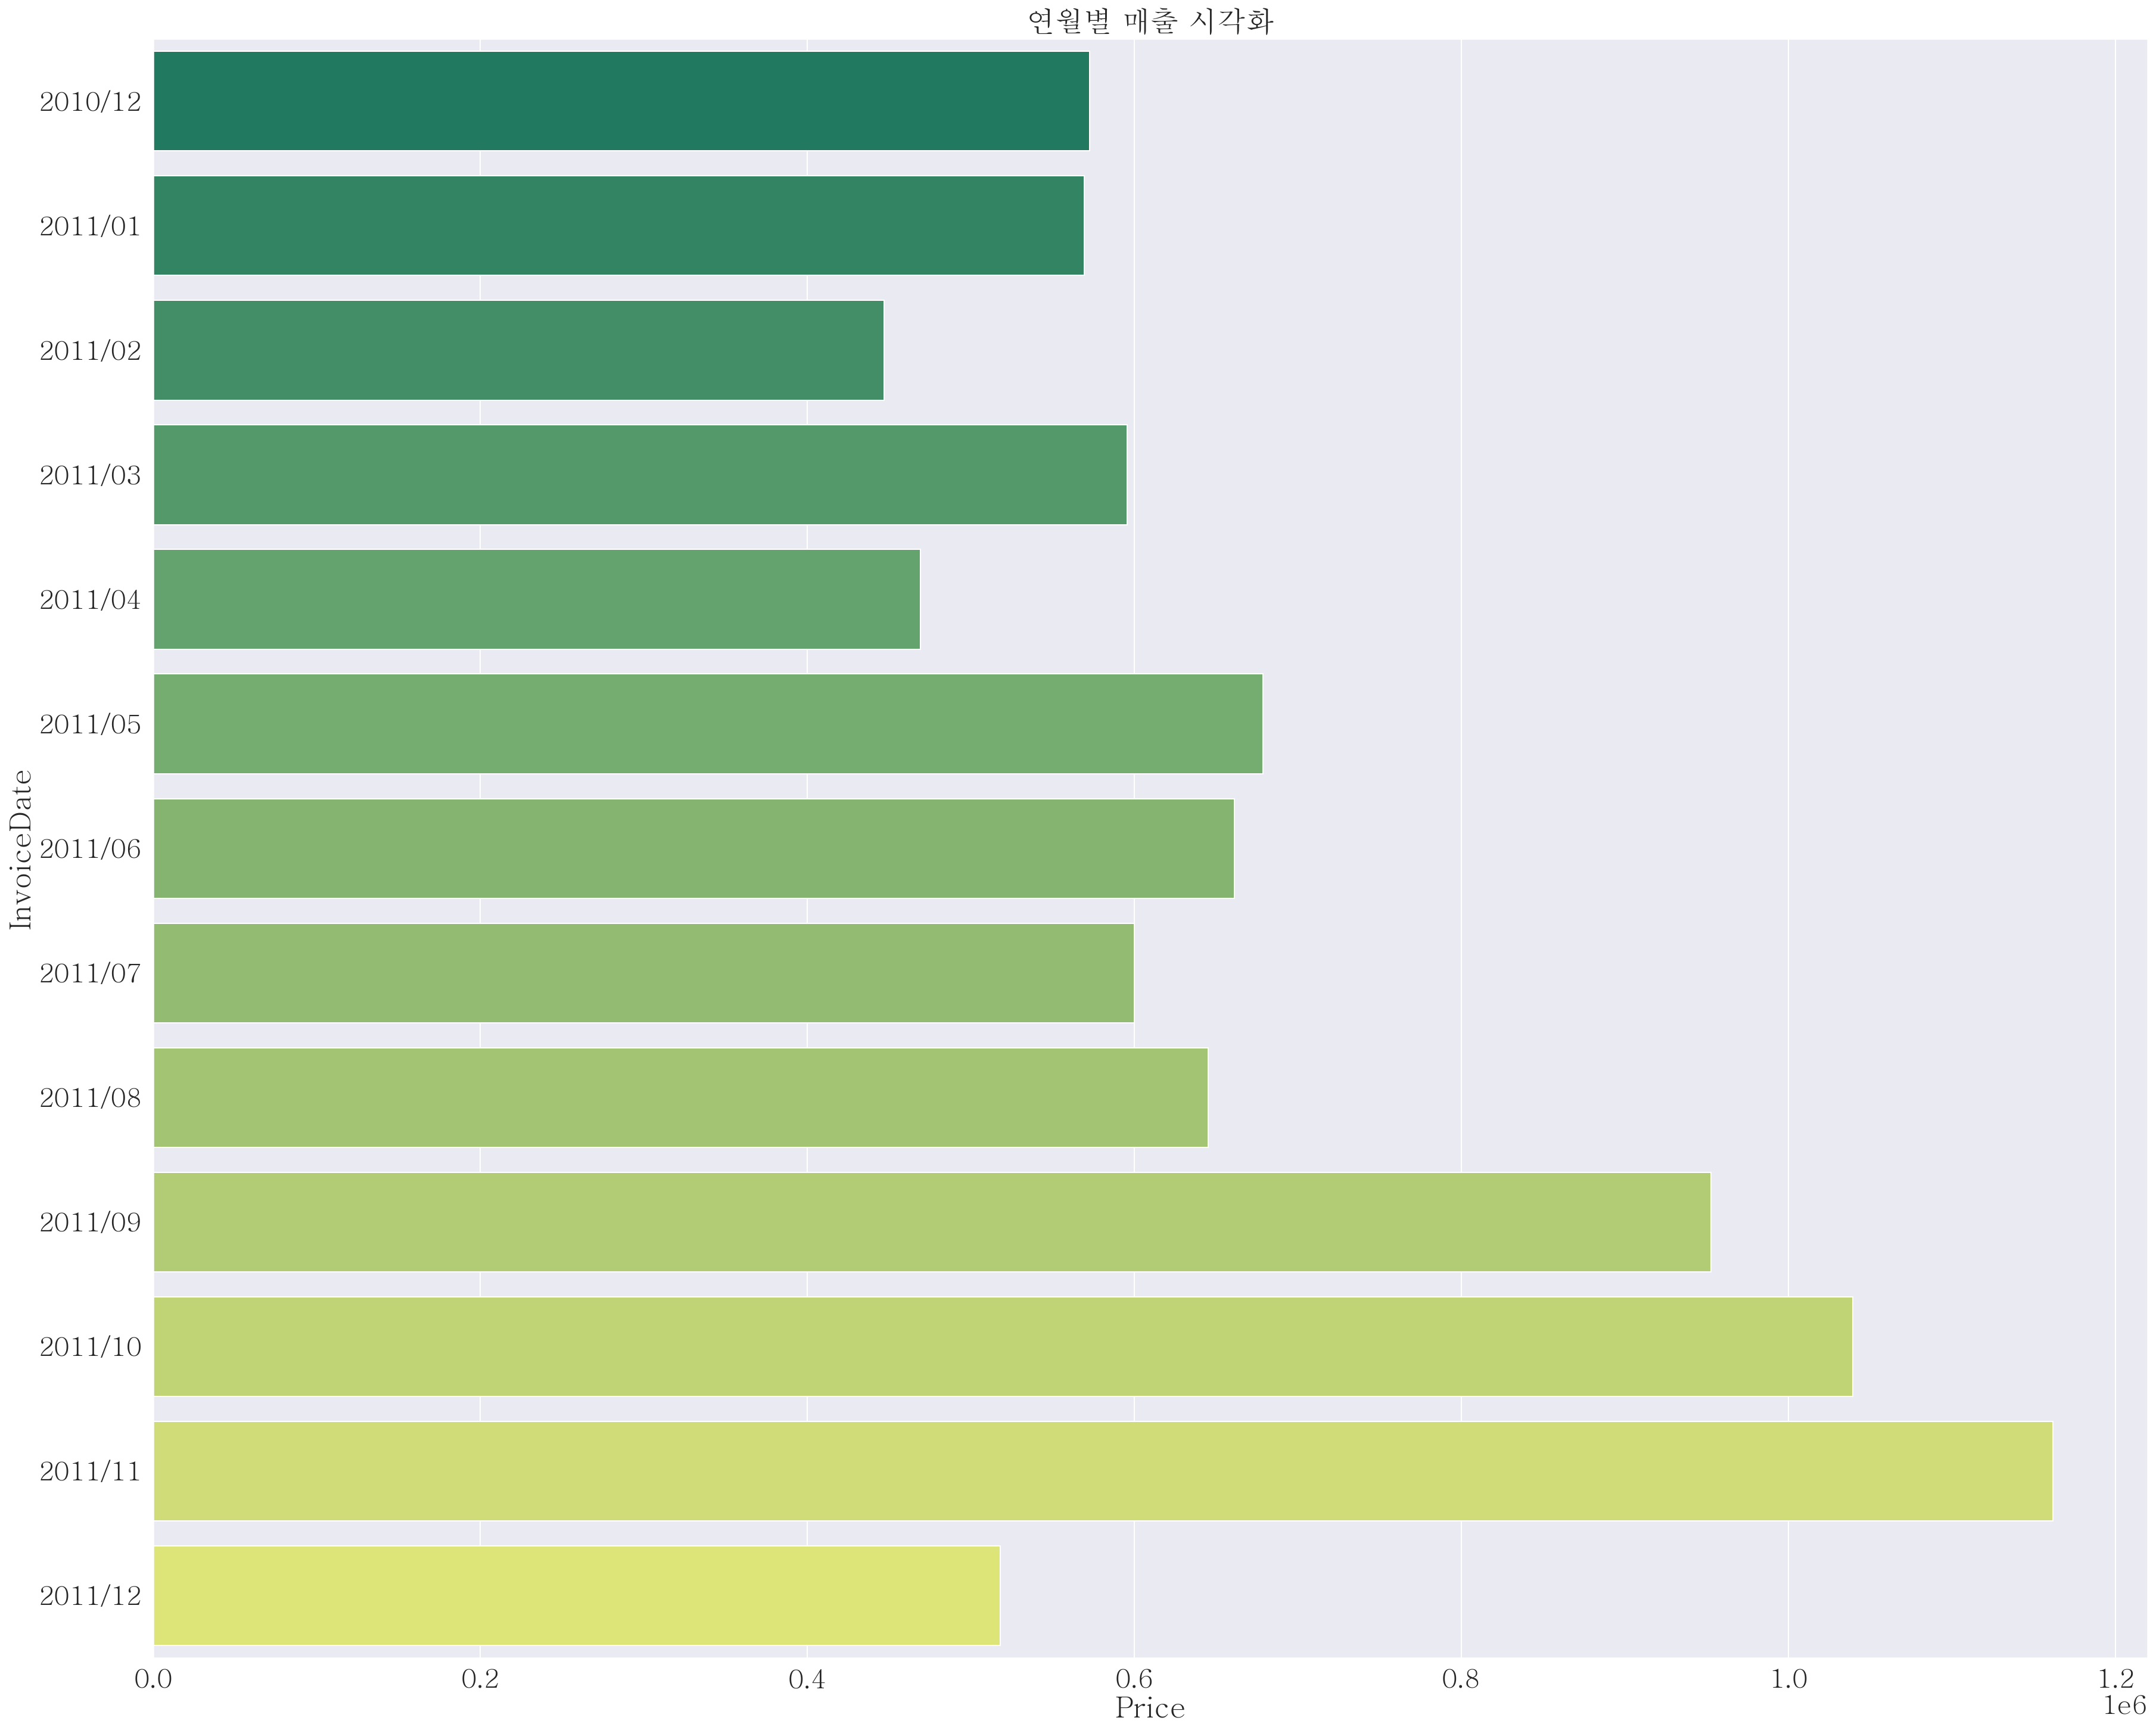

In [94]:
# 수진이 코드

d_price =df2.groupby(df2.index.day_name())['Price'].sum().sort_values()

mpl.rcParams['font.family'] = 'batang'
sns.barplot(d_price,d_price.index, palette='summer')
sns.set(font_scale=2)
plt.title('요일별 매출 시각화')
plt.rc('figure', figsize=(30,25))
plt.show()

import datetime

# strftime : 날짜/시간을 str으로 변환
x = df2.groupby(df2.index.strftime('%Y/%m'))['Price'].sum()
x

mpl.rcParams['font.family'] = 'batang'
sns.barplot(x, x.index, palette='summer')
sns.set(font_scale=2)
plt.title('연월별 매출 시각화')
plt.rc('figure', figsize=(30,25))
plt.show()


In [ ]:
plt.title("시간대에 따른 매출 변화")
plt.plot([10, 20, 30, 40], [1, 4, 9, 16], 'rs--')
plt.show()

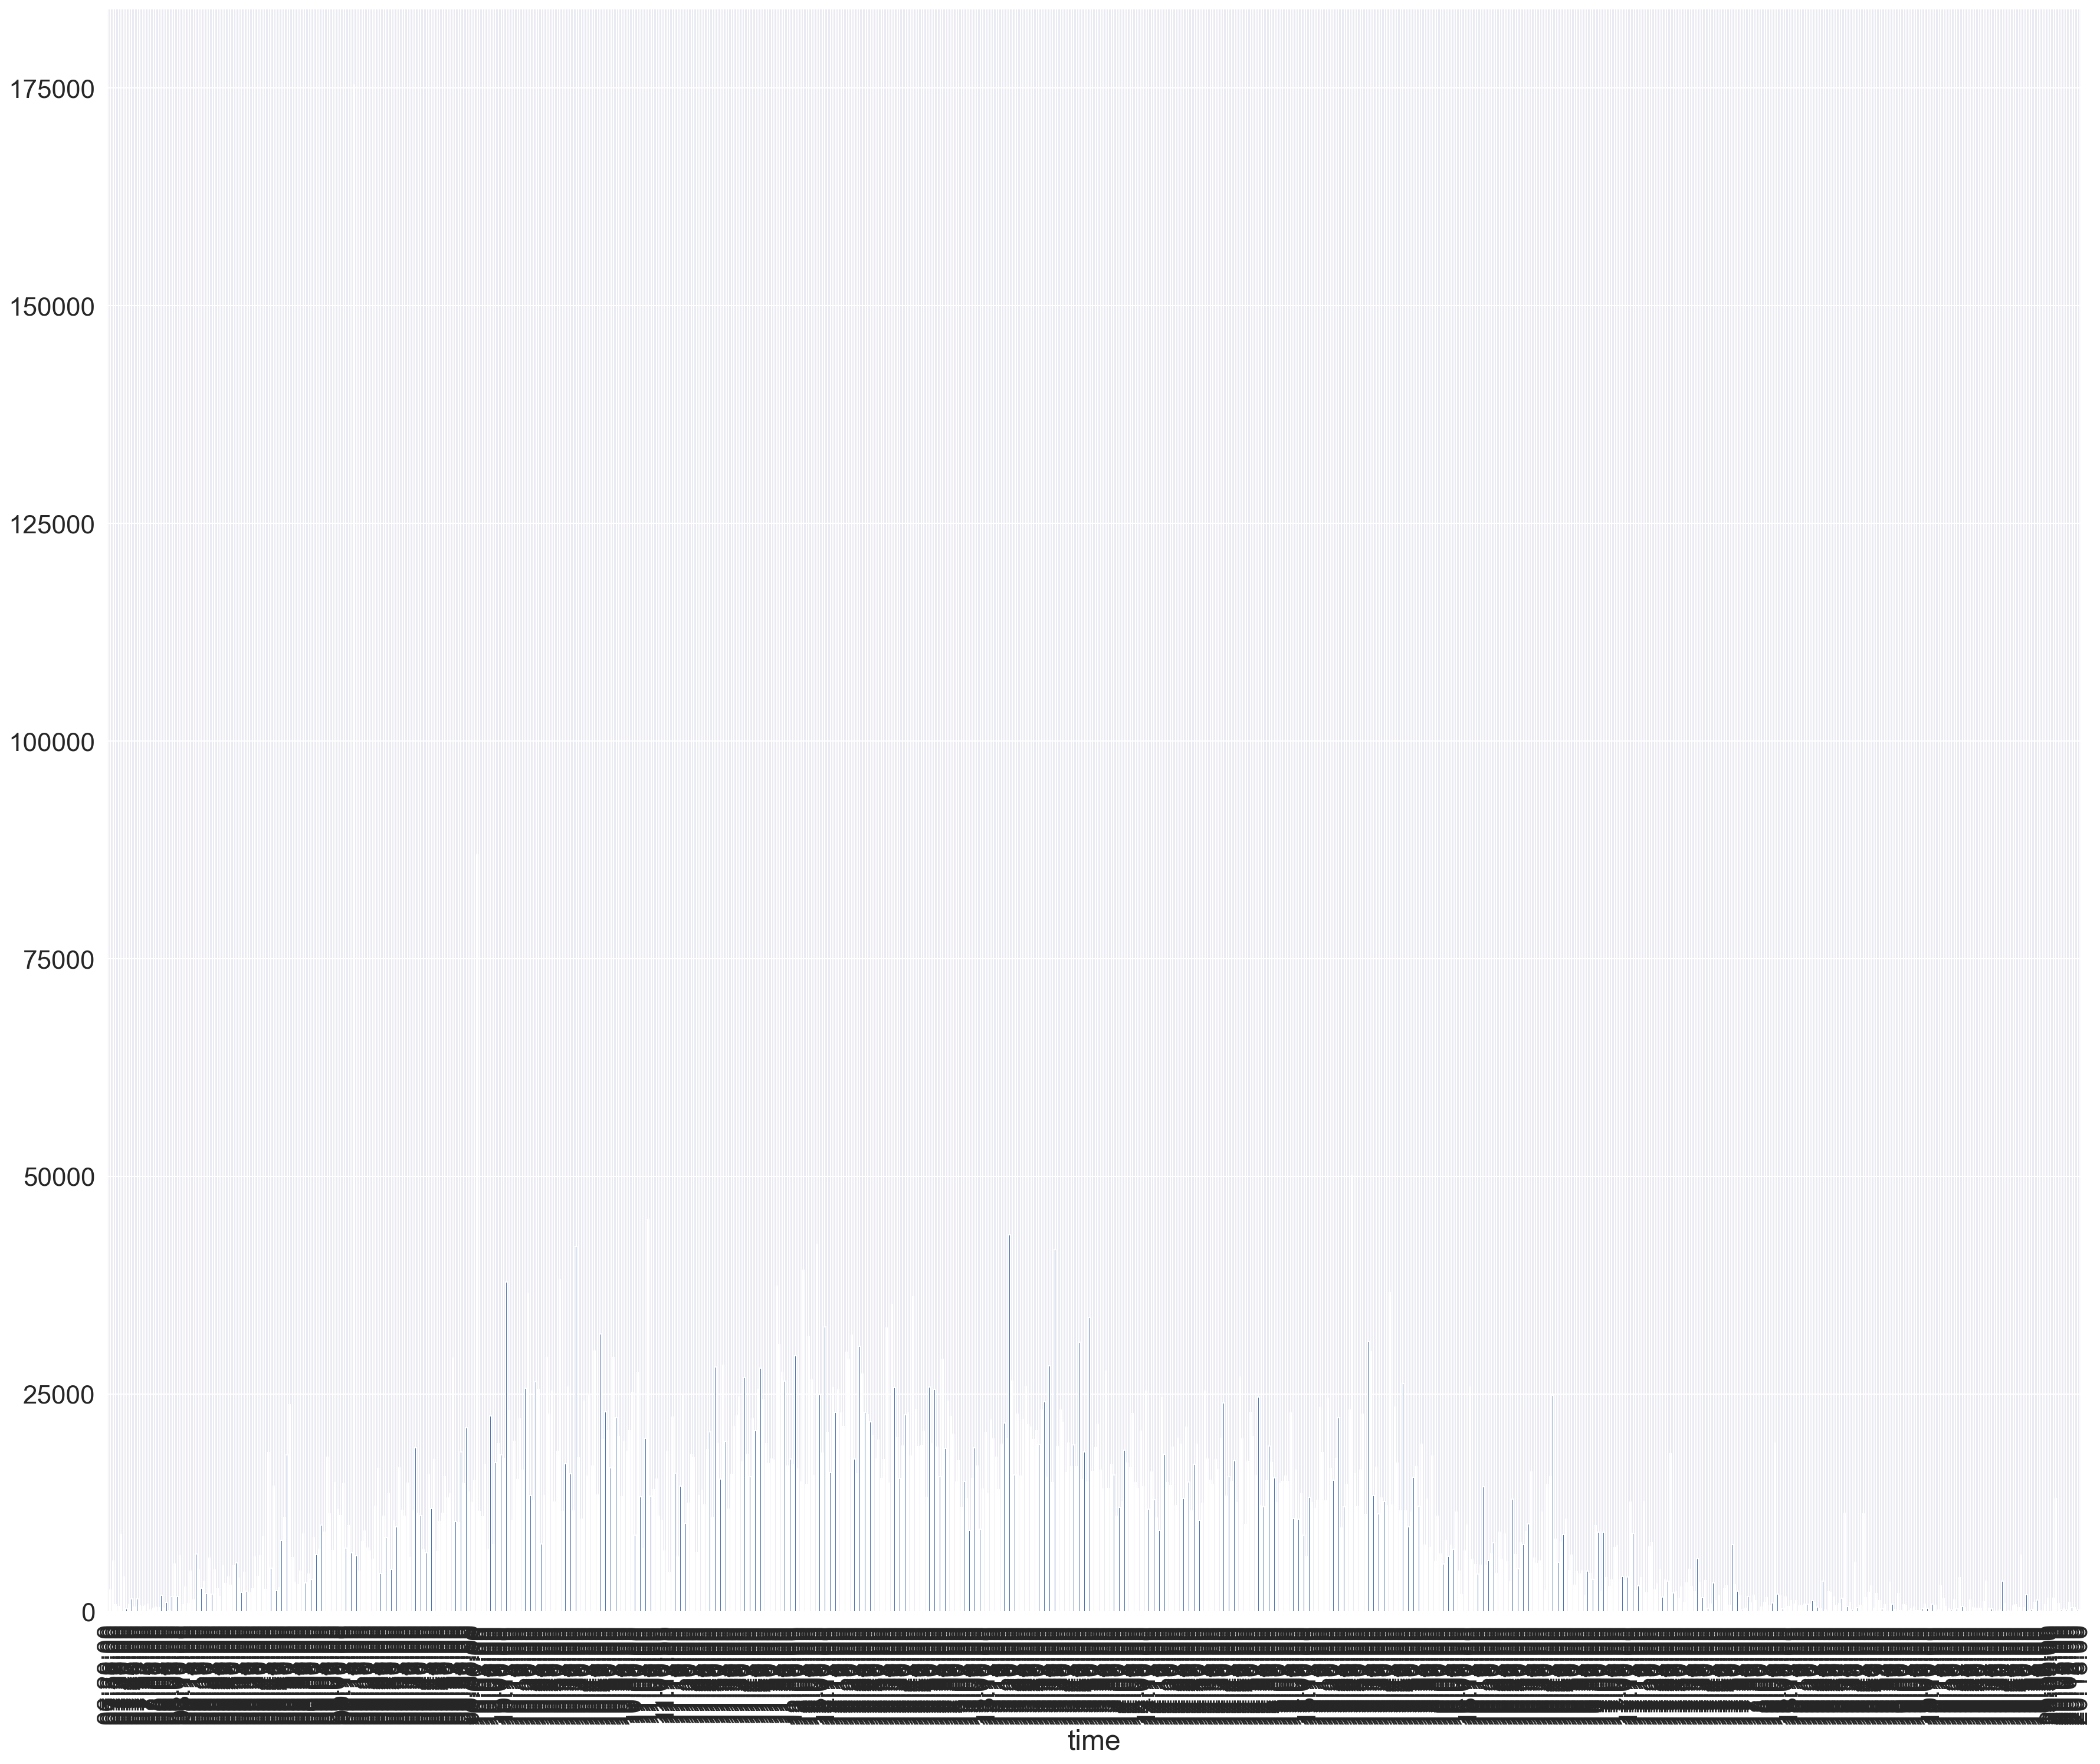

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price,day,month,year,dayofweek,time
123781,546913,47310M,"SMALL POP BOX,FUNKY MONKEY",6,2011-03-17 20:18:00,1.25,15861,United Kingdom,7.50,17,3,2011,3,20:18:00
123748,546913,20674,GREEN POLKADOT BOWL,2,2011-03-17 20:18:00,1.25,15861,United Kingdom,2.50,17,3,2011,3,20:18:00
123771,546913,16237,SLEEPING CAT ERASERS,30,2011-03-17 20:18:00,0.21,15861,United Kingdom,6.30,17,3,2011,3,20:18:00
123770,546913,16238,PARTY TIME PENCIL ERASERS,28,2011-03-17 20:18:00,0.21,15861,United Kingdom,5.88,17,3,2011,3,20:18:00
123769,546913,16236,KITTY PENCIL ERASERS,28,2011-03-17 20:18:00,0.21,15861,United Kingdom,5.88,17,3,2011,3,20:18:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184811,552710,23232,WRAP VINTAGE PETALS DESIGN,50,2011-05-11 07:35:00,0.42,13098,United Kingdom,21.00,11,5,2011,2,07:35:00
184812,552710,23231,WRAP DOILEY DESIGN,50,2011-05-11 07:35:00,0.42,13098,United Kingdom,21.00,11,5,2011,2,07:35:00
184813,552710,23209,LUNCH BAG DOILEY PATTERN,20,2011-05-11 07:35:00,1.65,13098,United Kingdom,33.00,11,5,2011,2,07:35:00
184832,552710,22740,POLKADOT PEN,48,2011-05-11 07:35:00,0.85,13098,United Kingdom,40.80,11,5,2011,2,07:35:00


In [95]:
df['time'] = df['InvoiceDate'].dt.time

# 시간대별 매출
time = df.groupby('time')['Price'].sum()

plt.subplot()
time.plot(kind='bar')
plt.show()

df.sort_values('time', ascending=False)

In [91]:
# 창규
time = pd.to_datetime(df.InvoiceDate.Unique())
time_sell = np.array(df.groupby('InvoiceDate')['Price'].sum())
sns.lineplot(x=time, y=time_sell)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'to_datetime'

In [46]:
# 월별 매출
rev_by_month = df.groupby('')['Price'].sum().sort_values()
rev_by_countries

Country
Saudi Arabia                145.920
Bahrain                     548.400
Czech Republic              826.740
RSA                        1002.310
Brazil                     1143.600
European Community         1300.250
Lithuania                  1661.060
Lebanon                    1693.880
United Arab Emirates       1902.280
Unspecified                2667.070
Malta                      2725.590
USA                        3580.390
Canada                     3666.380
Iceland                    4310.000
Greece                     4760.520
Israel                     7221.690
Poland                     7334.650
Austria                   10198.680
Cyprus                    13590.380
Italy                     17483.240
Denmark                   18955.340
Channel Islands           20450.440
Singapore                 21279.290
Finland                   22546.080
Portugal                  33439.890
Norway                    36165.440
Japan                     37416.370
Sweden              

In [96]:
rev_by_countries / total_revenue
# 각 국가들의 매출 비율

Country
Saudi Arabia            0.000016
Bahrain                 0.000062
Czech Republic          0.000093
RSA                     0.000112
Brazil                  0.000128
European Community      0.000146
Lithuania               0.000186
Lebanon                 0.000190
United Arab Emirates    0.000213
Unspecified             0.000299
Malta                   0.000306
USA                     0.000402
Canada                  0.000411
Iceland                 0.000484
Greece                  0.000534
Israel                  0.000810
Poland                  0.000823
Austria                 0.001144
Cyprus                  0.001525
Italy                   0.001962
Denmark                 0.002127
Channel Islands         0.002295
Singapore               0.002388
Finland                 0.002530
Portugal                0.003752
Norway                  0.004058
Japan                   0.004199
Sweden                  0.004307
Belgium                 0.004623
Switzerland             0.006334
Sp

In [48]:
# def extract_month(date):
#    month = str(date.month)
#    if date.month <10:
#        month='0'+month
#    return str(date.year)+month

def extract_month(date):
    return str(date.year)+str(date.month).rjust(2,'0')

# rjust 함수는 문자열을 오른쪽 정렬해서 보기좋게 출력해서 쓴다 (ljust는 왼쪽정렬)
# 형태는 문자열.rjust(전체 자리 숫자, 공백이 있을경우 공백을 채울 텍스트(아무것도안쓰면공백그대로))
# rjust를 사용하기 위해
서는 string으로 변환 먼저 해줘야 함

In [49]:
# grouping하기 위해서 해당 변수를 우선 index로 만들기
rev_by_month=df.set_index('InvoiceDate').groupby(extract_month).sum()['Price']
rev_by_month

InvoiceDate
201012     572713.890
201101     569445.040
201102     447137.350
201103     595500.760
201104     469200.361
201105     678594.560
201106     661213.690
201107     600091.011
201108     645343.900
201109     952838.382
201110    1039318.790
201111    1161817.380
201112     518192.790
Name: Price, dtype: float64

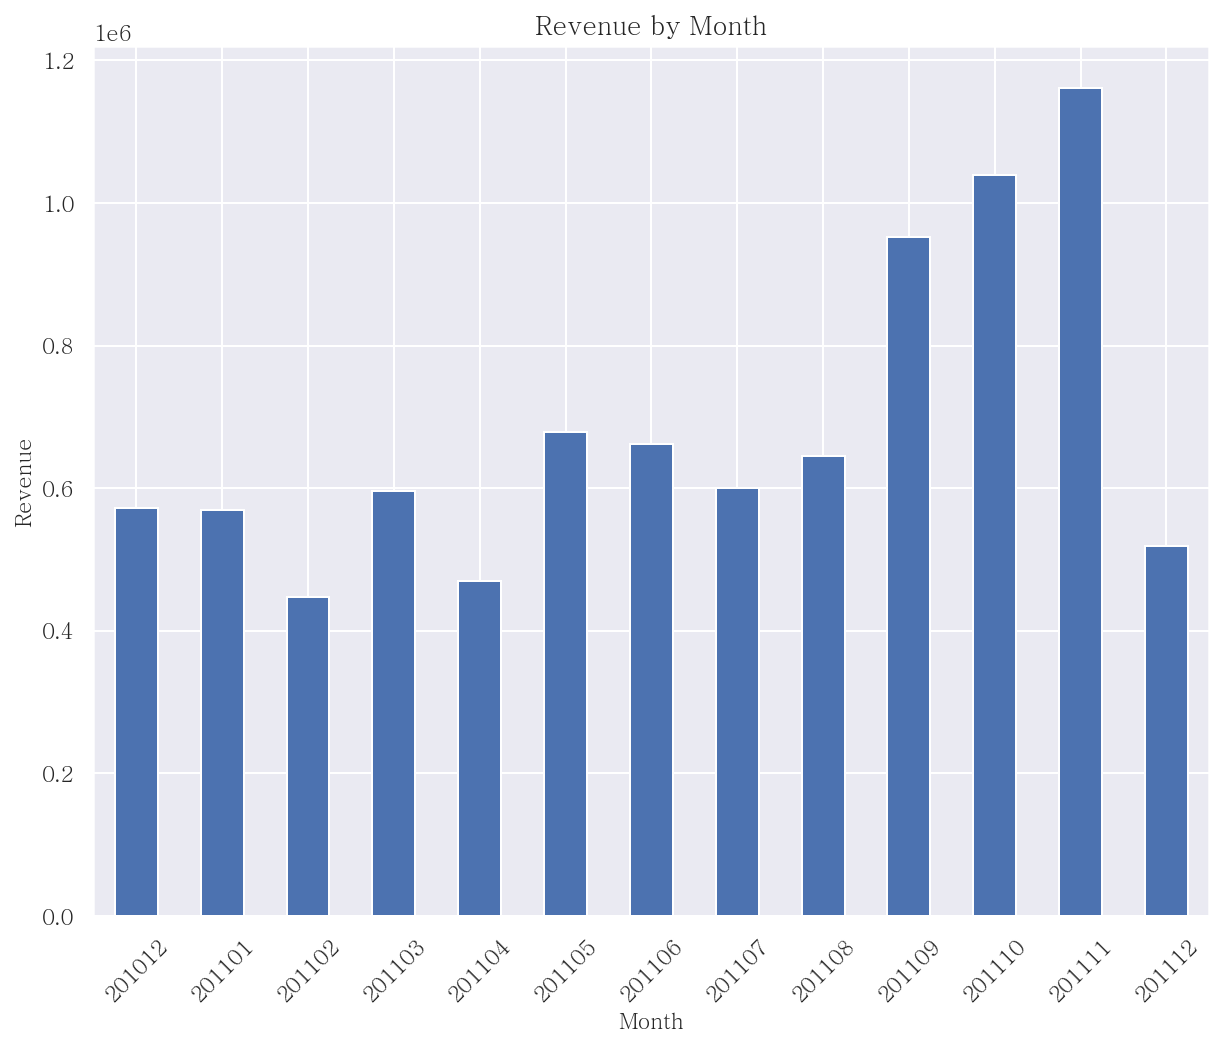

In [50]:
# 바 그래프를 몇 번 그릴 것을 대비해서 함수를 정의해놓음

def plot_bar(df, xlabel,ylabel,title, figsize=(30,10), rotation=45):
    plot=df.plot(kind='bar')
    plot.set_xlabel(xlabel,fontsize=11)
    plot.set_ylabel(ylabel,fontsize=11)
    plot.set_title(title, fontsize=13)
    plot.set_xticklabels(labels=df.index, rotation=rotation)
    
plot_bar(rev_by_month,'Month','Revenue','Revenue by Month')

In [53]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


### 요일별 매출

In [54]:
# 요일별 매출
rev_by_day=df.set_index('InvoiceDate').groupby(lambda date:date.dayofweek).sum()['Price']
rev_by_day #0이 월요일, 5가 토요일, 6이 일요일

InvoiceDate
0    1367146.411
1    1700634.631
2    1588336.170
3    1976859.070
4    1485917.401
6     792514.221
Name: Price, dtype: float64

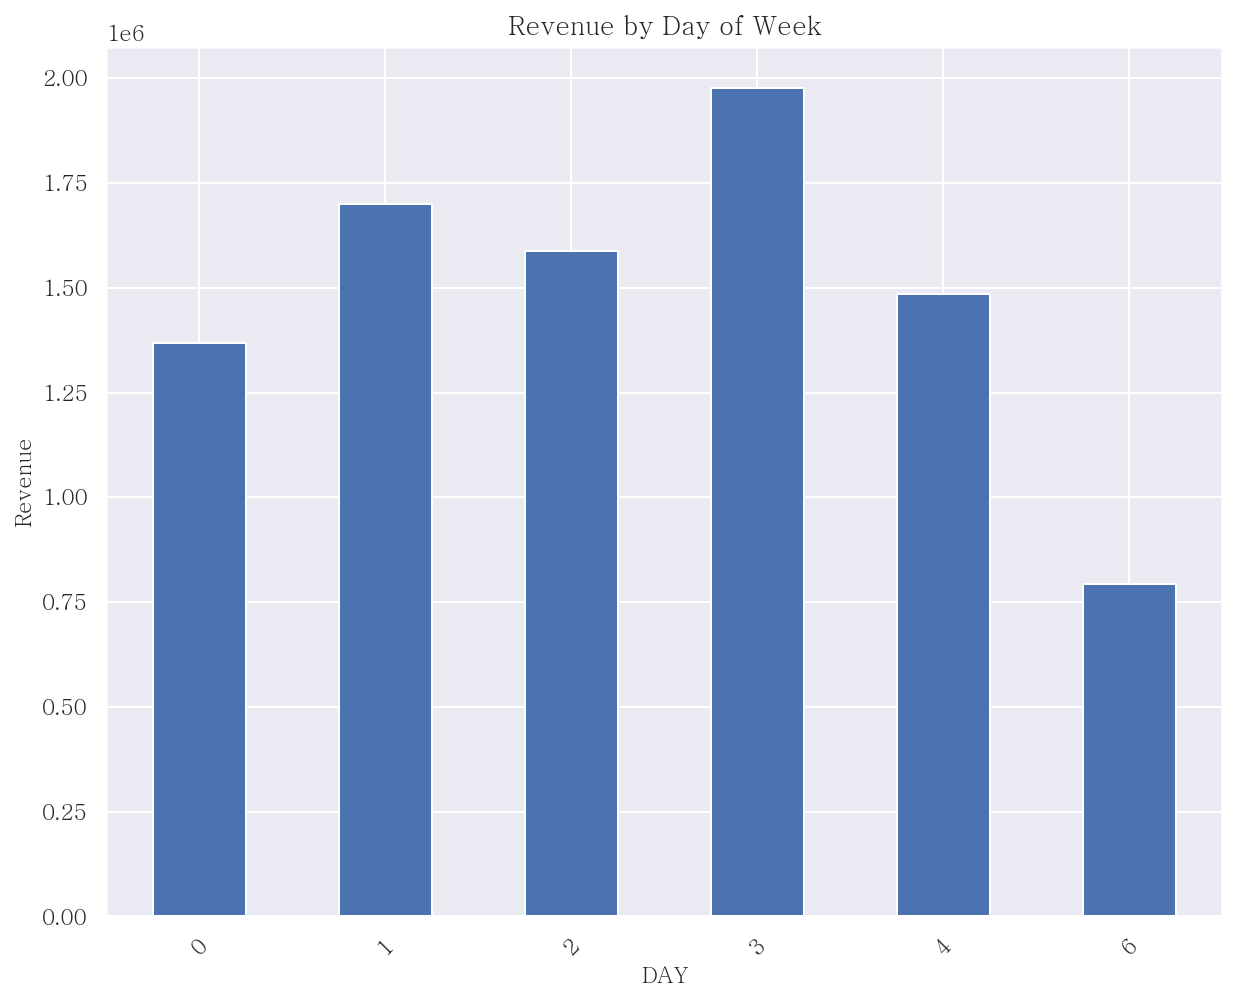

In [55]:
# 일별 판매량
plot_bar(rev_by_day,'DAY','Revenue','Revenue by Day of Week')

In [56]:
# 월화수목금토일
Day_week=np.array(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
Day_week

array(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], dtype='<U3')

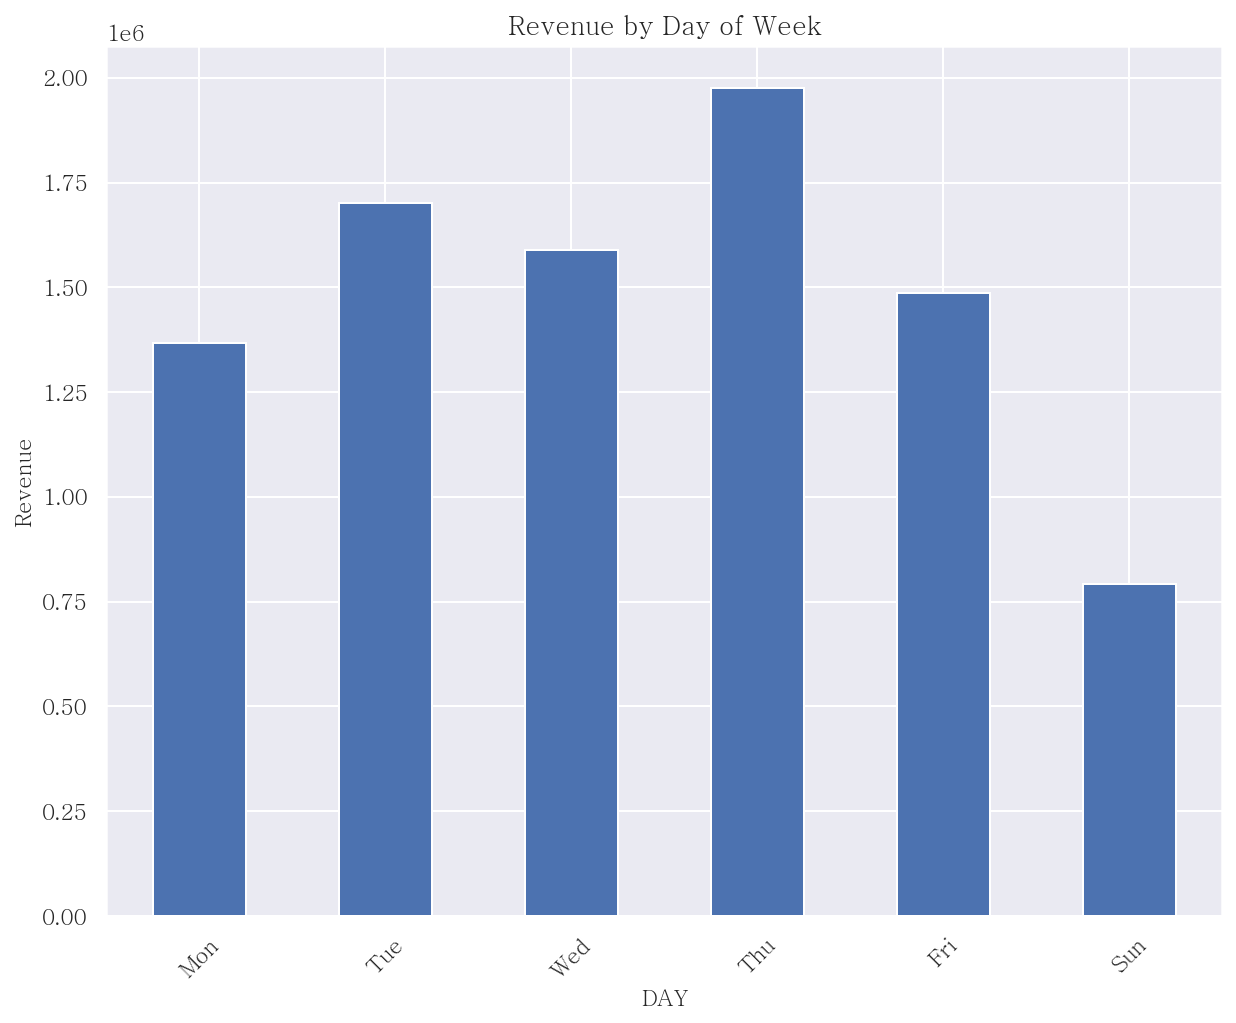

In [57]:
# 막대그래프에 붙여서 완성
rev_by_day.index=Day_week[rev_by_day.index]
plot_bar(rev_by_day,'DAY','Revenue','Revenue by Day of Week')

- 데이터는 많지 않지만 인사이트는 많이 낼수잇다

### 시간대별 매출, 상위 매출 제품의 월별 판매량 추리

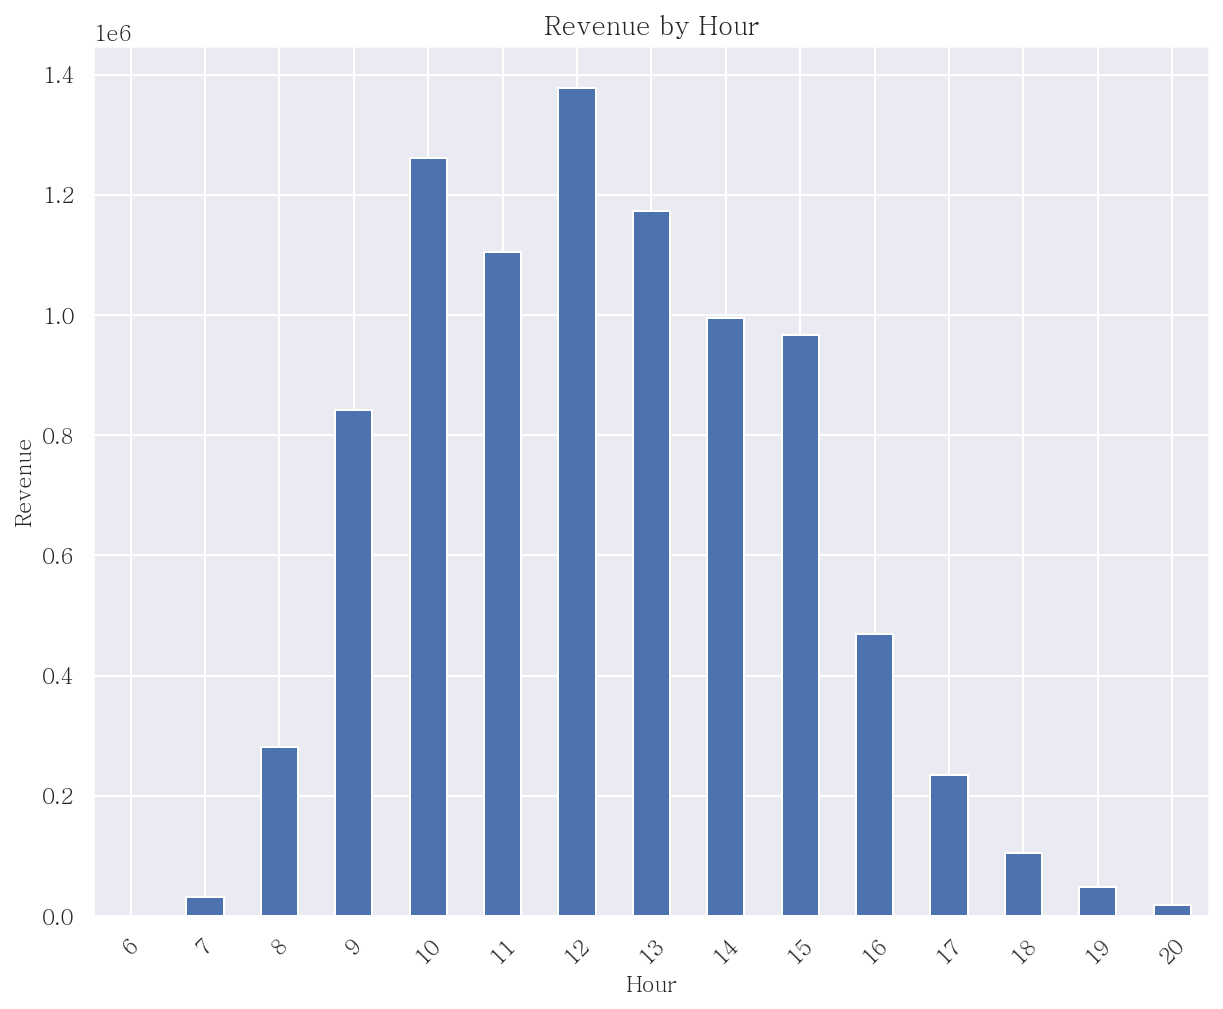

In [58]:
# 시간별 매출
rev_by_hour=df.set_index('InvoiceDate').groupby(lambda date:date.hour).sum()['Price']
plot_bar(rev_by_hour,'Hour','Revenue','Revenue by Hour')

# 아침 9시부터 오후 3시 전후로 매출이 높음
# 정오(12시)에 매출이 피크를 찍고 점점 감소하고 오후 3시부터 급격하게 하락한다

#### 몇시에 push 마케팅을 하는게 제일 좋을까?
- 매출이 급상승하는 아침 9시부터 12시까지 push 마케팅을 하면 상승세를 높여 매출 최고점이 갱신되는 효과를 기대할 수 있다
- 매출이 하락하는 12시부터 오후 시간대에 push 마케팅을 해서 매출 감소추세가 둔화되는 효과를 기대할 수 있다

### 고객 코호트(cohort) 분석
- 사용자가 감소하는 시기가 언제인지를 적절히 포착하여 이에 따른 개선방안을 타이밍좋게 실행할 수 있다

In [98]:
# 고객ID에 첫번째 주문일자를 추가
# 고객ID를 인덱스로 만듦 (inplace)
df.set_index('CustomerID',inplace=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Price,day,month,year,dayofweek,time
CustomerID,,,,,,,,,,,,,
17850,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,1,12,2010,2,08:26:00
17850,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,1,12,2010,2,08:26:00
17850,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,1,12,2010,2,08:26:00
17850,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,1,12,2010,2,08:26:00
17850,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,1,12,2010,2,08:26:00


### 가장 많이 팔린 아이템

### 우수 고객 찾기
- 우수 고객은 구매액이 가장 많은 고객?
- 빈도수가 높은 고객? (충성고객)

In [86]:
# 가장 구매액이 높은 고객
onlien_spent = df[['CustomerID', 'Price']].groupby(['CustomerID']).sum()
onlien_spent = onlien_spent[onlien_spent['Price'] > 0]
onlien_spent.sort_values('Price', ascending = False)

,Price
CustomerID,
14646,280206.02
18102,259657.30
17450,194550.79
16446,168472.50
14911,143825.06
...,...
16878,13.30
17956,12.75
16454,6.90


In [87]:
a = df.groupby([df.index.time, df.Description.values])['Price'].sum()
sns.barplot(a.index.values, a)

AttributeError: 'Int64Index' object has no attribute 'time'

In [ ]:
# 가장 자주 물건을 산 사람


### 고객별 주문을 가장 많이 하는 시간은?